AMAZON SALES ANALYSIS


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\91880\OneDrive\Desktop\Data_Analysis _pythonprojects\AMAZON_SALES_DA\Amazon Sale Report.csv', encoding = 'unicode_escape')

In [8]:
df.shape

(128976, 21)

In [13]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN


In [14]:
df.tail(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [15]:
#for information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [17]:
#drop unreletated / blank columns
#axis = 1 : for using full columns
#inplace = True : for saving the changes made till now (like new and pending column removed and saved ) 

df.drop(['New', 'PendingS'], axis = 1, inplace = True )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [20]:
# checking for null value 
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [21]:
#sum will give total values of nll values
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [23]:
# To know the rows and columns
df.shape

(128976, 19)

In [29]:
#Drop the null values
df.dropna(inplace = True)

In [31]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [25]:
df.shape

(37514, 19)

In [26]:
df.columns
# names of column

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [32]:
#changing the data type of postal code from float64 to integer
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [35]:
# checking the data type changed or not 
df['ship-postal-code'].dtype

dtype('int32')

In [40]:
# changing the datatype of Date from object to Date 
df['Date'] = pd.to_datetime(df['Date'])

In [37]:
df['Date'].dtype

dtype('<M8[ns]')

In [38]:
df['Date']
# checking whether datatype to datetime changed or not 

0        2022-04-30
1        2022-04-30
3        2022-04-30
7        2022-04-30
12       2022-04-30
            ...    
128875   2022-06-01
128876   2022-06-01
128888   2022-05-31
128891   2022-05-31
128892   2022-05-31
Name: Date, Length: 37514, dtype: datetime64[ns]

In [41]:
# Renaming the Columns in dataset 
df.rename(columns = {'Qty' : 'Quantity'}, inplace = True)

In [42]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [44]:
#describe() method returns description of the data in the dataframe (i.e. count, mean, std, max,etc) - omly numerical

# include = 'object'  for including strings also
df.describe(include = 'object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [47]:
#use describe() for specific columns is possible 
df[['Quantity', 'Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


EXPLORATORY DATA ANALYSIS

In [48]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

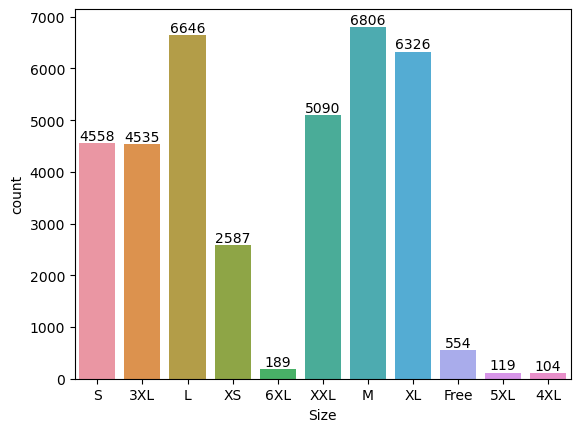

In [56]:
# to visualize the sizes available and counts 
ax = sns.countplot(x = 'Size', data = df)  

# for mentioning the count of the sales
for bars in ax.containers:
    ax.bar_label(bars)

NOTE : FROM ABOVE BAR GRAPH, YOU CAN SEE THAT MOST OF THE PEOPLE BUYS 'M' SIZE

GROUP BY 

The groupby() function in pandas is used to group data based on one or more coulumns in dataframe together to visualize

In [57]:
df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by = ['Quantity'], ascending = False)

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


In [58]:
S_qty = df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by = ['Quantity'], ascending = False)

<Axes: xlabel='Size', ylabel='Quantity'>

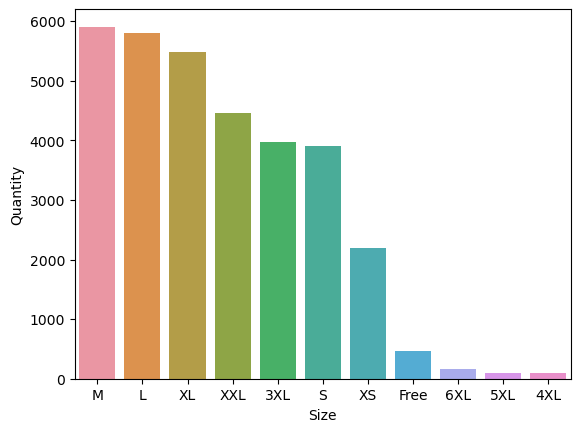

In [66]:
sns.barplot(x = 'Size', y = 'Quantity', data = S_qty)

NOTE : FROM ABOVE GRAPH YOU CAN SEE THAT MOST OF THE QUANTITY BUYS m-SIZE IN THE SALES 

COURIER STATUS

<Axes: xlabel='Courier Status', ylabel='count'>

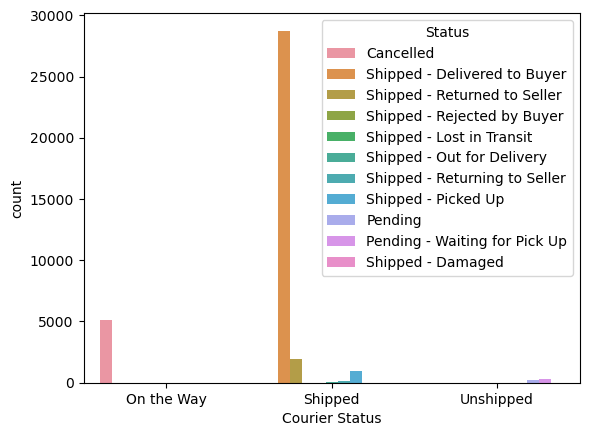

In [68]:
sns.countplot(data = df, x = 'Courier Status', hue = 'Status')

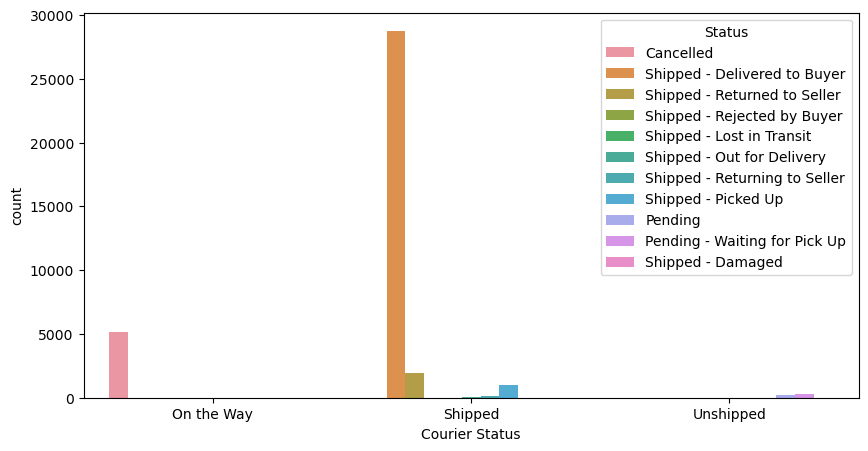

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Courier Status', hue = 'Status')
plt.show()

NOTE : MAJORITY OF OF THE ORDERS ARE SHIPPED THROUGH THE COURIER

# Histogram 

<Axes: >

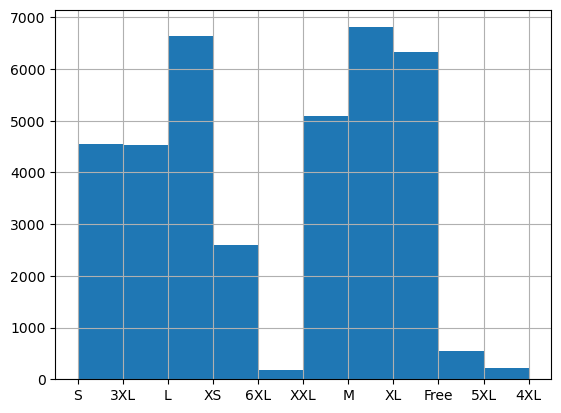

In [73]:
df['Size'].hist()

CATEGORY HISTOGRAM

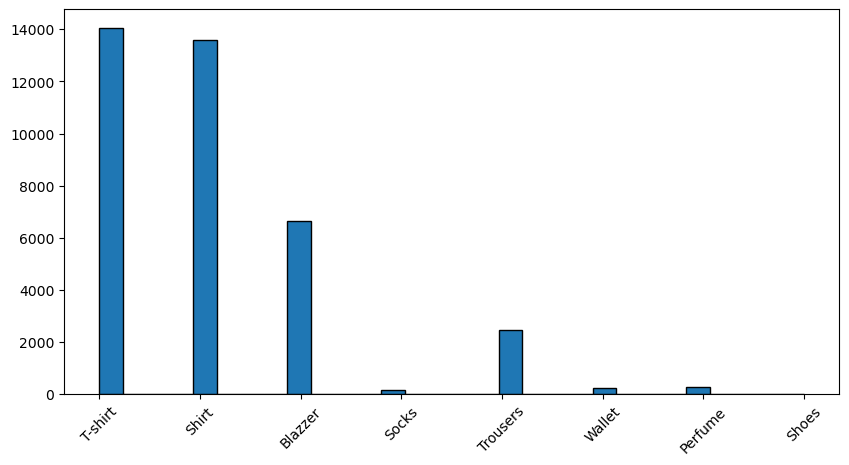

In [80]:
df['Category'] = df['Category'].astype(str)
data = df['Category']
plt.figure(figsize= (10,5))
plt.hist(data, bins = 30, edgecolor = 'Black')
plt.xticks(rotation = 45)
plt.show()

NOTE : MOST OF THE BUYERS ARE FOR TSHIRTS and shirts 

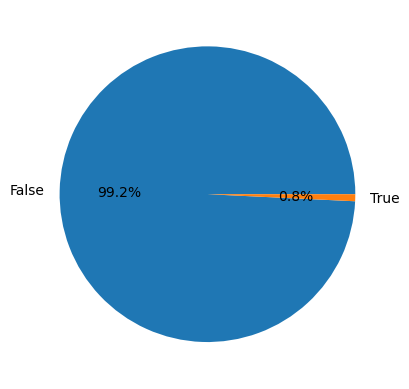

In [85]:
#checking B2b data 
b2b_check = df['B2B'].value_counts()

#plot the pie chart 
plt.pie(b2b_check, labels = b2b_check.index, autopct = '%1.1f%%')
plt.show()

NOTE : FROM ABOVE CHART  WE CAN SEE THAT MAXIMUM I.E 99.3% BUYERS ARE RETAILERS AND 0.8% ARE B2B BUYERS

SCATTER PLOT 

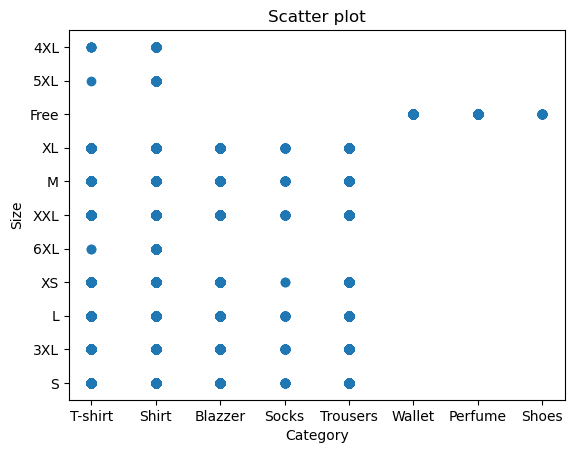

In [90]:
# PREPARE DATA FOR SCATTER PLOT 
x_data = df['Category']
y_data = df['Size']

#PLOT THE SCATTER PLOT
plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter plot')
plt.show()

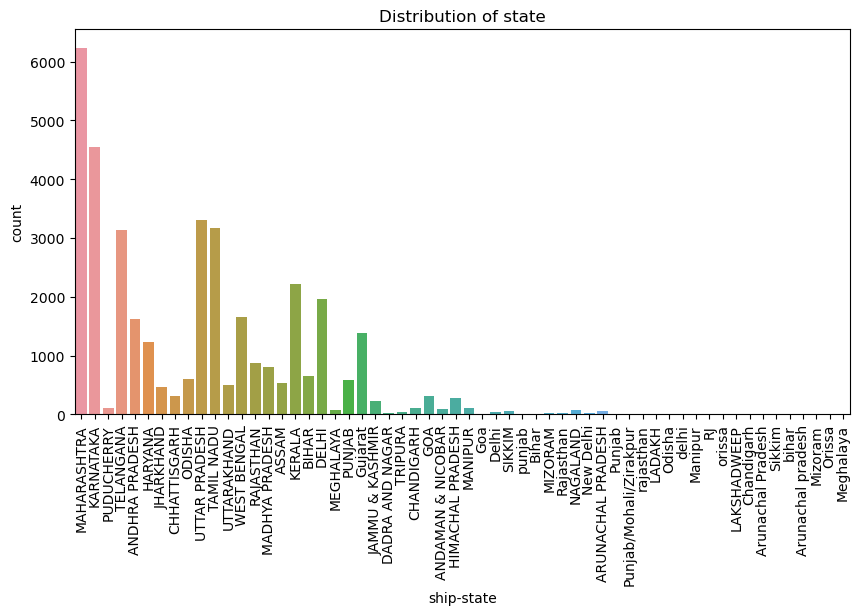

In [91]:
#plot count of cities by state
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of state')
plt.xticks(rotation = 90)
plt.show()

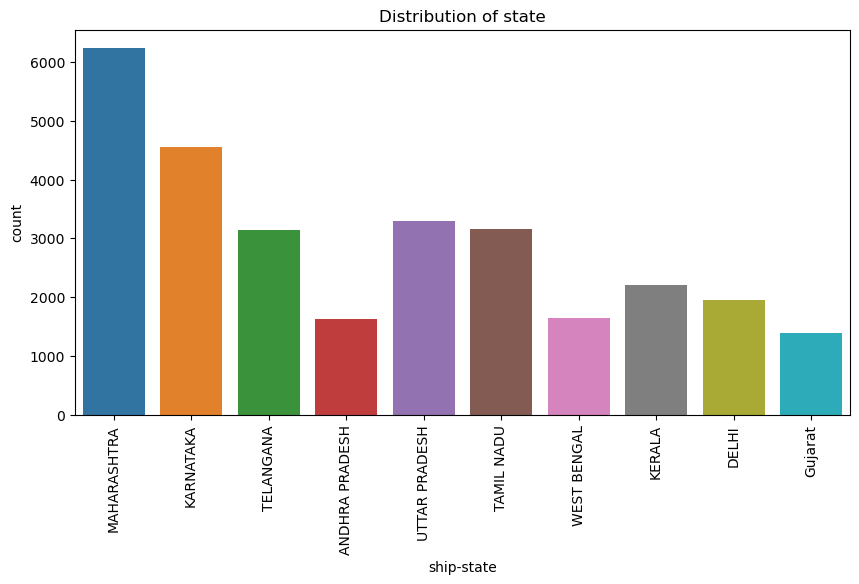

In [94]:
#top 10 states
top_10 = df['ship-state'].value_counts().head(10)

#plot count of cities by state
plt.figure(figsize = (10,5))
sns.countplot(data = df[df['ship-state'].isin(top_10.index)], x = 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of state')
plt.xticks(rotation = 90)
plt.show()

NOTE : from above Graph you can see that most of the buyers are from Maharashtra.


CONCLUSION : THE DATA ANALYSIS REVEALS THAT THE BUSINESS HAS A SIGNIFICAN CUSTOMER BASE IN MAHARASHTRA STATE, MAINLY SERVERS RETAILERS, FULFILLS ORDERS TROUGH AMAZON, EXPERIENCE HIGH DEMAND FOR T-SHIRTS, AND SEES A M-SIZE AS THE PREFERRED CHOICE AMONG BUYERS.